# Data Analytics for Health - Task 1.1: Exploratory Data Analysis

## Overview
This notebook performs exploratory data analysis (EDA) on four healthcare datasets:
1. **Heart Diagnoses** - Clinical notes and patient information
2. **Laboratory Events Codes** - Lab test results and measurements  
3. **Microbiology Events Codes** - Microbiology test results
4. **Procedure Codes** - Medical procedures and ICD codes

## Objectives
- Load and examine the structure of all four datasets
- Perform data understanding and quality assessment
- Create meaningful distribution plots for key variables
- Identify patterns and characteristics in the healthcare data

---

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set up file paths
notebook_dir = Path.cwd().resolve()
data_path = (notebook_dir / '..' / '..' / 'Data').resolve()
out_dir = (notebook_dir / '..' / 'plots').resolve()
out_dir.mkdir(parents=True, exist_ok=True)

print("Libraries imported successfully")
print(f"Data path: {data_path}")
print(f"Output directory: {out_dir}")

Libraries imported successfully
Data path: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/Data
Output directory: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots


## 1. Data Loading

We'll load all four datasets and examine their basic structure to understand what we're working with.


In [2]:
# Load all four datasets
datasets = {
    "Heart Diagnoses": "heart_diagnoses_1.csv",
    "Laboratory Events": "laboratory_events_codes_2.csv", 
    "Microbiology Events": "microbiology_events_codes_3.csv",
    "Procedure Codes": "procedure_code_4.csv"
}

# Load datasets into DataFrames
dfs = {}
for name, filename in datasets.items():
    filepath = data_path / filename
    dfs[name] = pd.read_csv(filepath)
    print(f"Loaded {name}: {dfs[name].shape[0]:,} rows × {dfs[name].shape[1]} columns")

# Assign to individual variables for convenience
df1 = dfs["Heart Diagnoses"]  # heart_diagnoses
df2 = dfs["Laboratory Events"]  # laboratory_events
df3 = dfs["Microbiology Events"]  # microbiology_events  
df4 = dfs["Procedure Codes"]  # procedure_codes

print(f"\nAll datasets loaded successfully!")


Loaded Heart Diagnoses: 4,864 rows × 25 columns
Loaded Laboratory Events: 978,503 rows × 14 columns
Loaded Microbiology Events: 15,587 rows × 14 columns
Loaded Procedure Codes: 14,497 rows × 6 columns

All datasets loaded successfully!


## 2. Data Understanding

Let's examine the structure, data types, and basic characteristics of each dataset to understand what we're working with.


In [13]:
# Feature-wise describe() for all datasets
print("Generating per-feature describe() for all datasets...")
print("="*80)

for dataset_name, df in dfs.items():
    print(f"\n{'='*80}")
    print(f"DATASET: {dataset_name}")
    print(f"Rows: {len(df):,}, Columns: {df.shape[1]}")
    print(f"{'='*80}")
    
    print(df.describe())

print("\nAll feature-wise describe() summaries completed.")


Generating per-feature describe() for all datasets...

DATASET: Heart Diagnoses
Rows: 4,864, Columns: 25
         subject_id       hadm_id     note_seq  subject_id_dx          age  \
count  4.864000e+03  4.864000e+03  4864.000000   4.864000e+03  1363.000000   
mean   1.510717e+07  2.501745e+07    14.690995   1.500158e+07    68.978723   
std    2.938761e+06  2.873736e+06     8.260520   2.879841e+06    14.973358   
min    1.000098e+07  2.000446e+07     2.000000   1.000098e+07    18.000000   
25%    1.252385e+07  2.260252e+07     9.000000   1.246683e+07    60.000000   
50%    1.507553e+07  2.503238e+07    14.000000   1.498641e+07    70.000000   
75%    1.764939e+07  2.746833e+07    19.000000   1.750476e+07    81.000000   
max    1.999860e+07  2.999967e+07    94.000000   1.999850e+07    95.000000   

       anchor_year  
count  1363.000000  
mean   2155.620690  
std      23.400097  
min    2110.000000  
25%    2136.000000  
50%    2157.000000  
75%    2174.000000  
max    2206.000000  

DA

Creating box plots for all numeric features...
Heart Diagnoses: 3 suitable numeric features
Laboratory Events: 3 suitable numeric features
Microbiology Events: 1 suitable numeric features
Procedure Codes: 1 suitable numeric features

Total features to plot: 8

Plotting Heart Diagnoses...

Plotting Laboratory Events...

Plotting Microbiology Events...

Plotting Procedure Codes...

Saved: all_datasets_boxplots.jpg


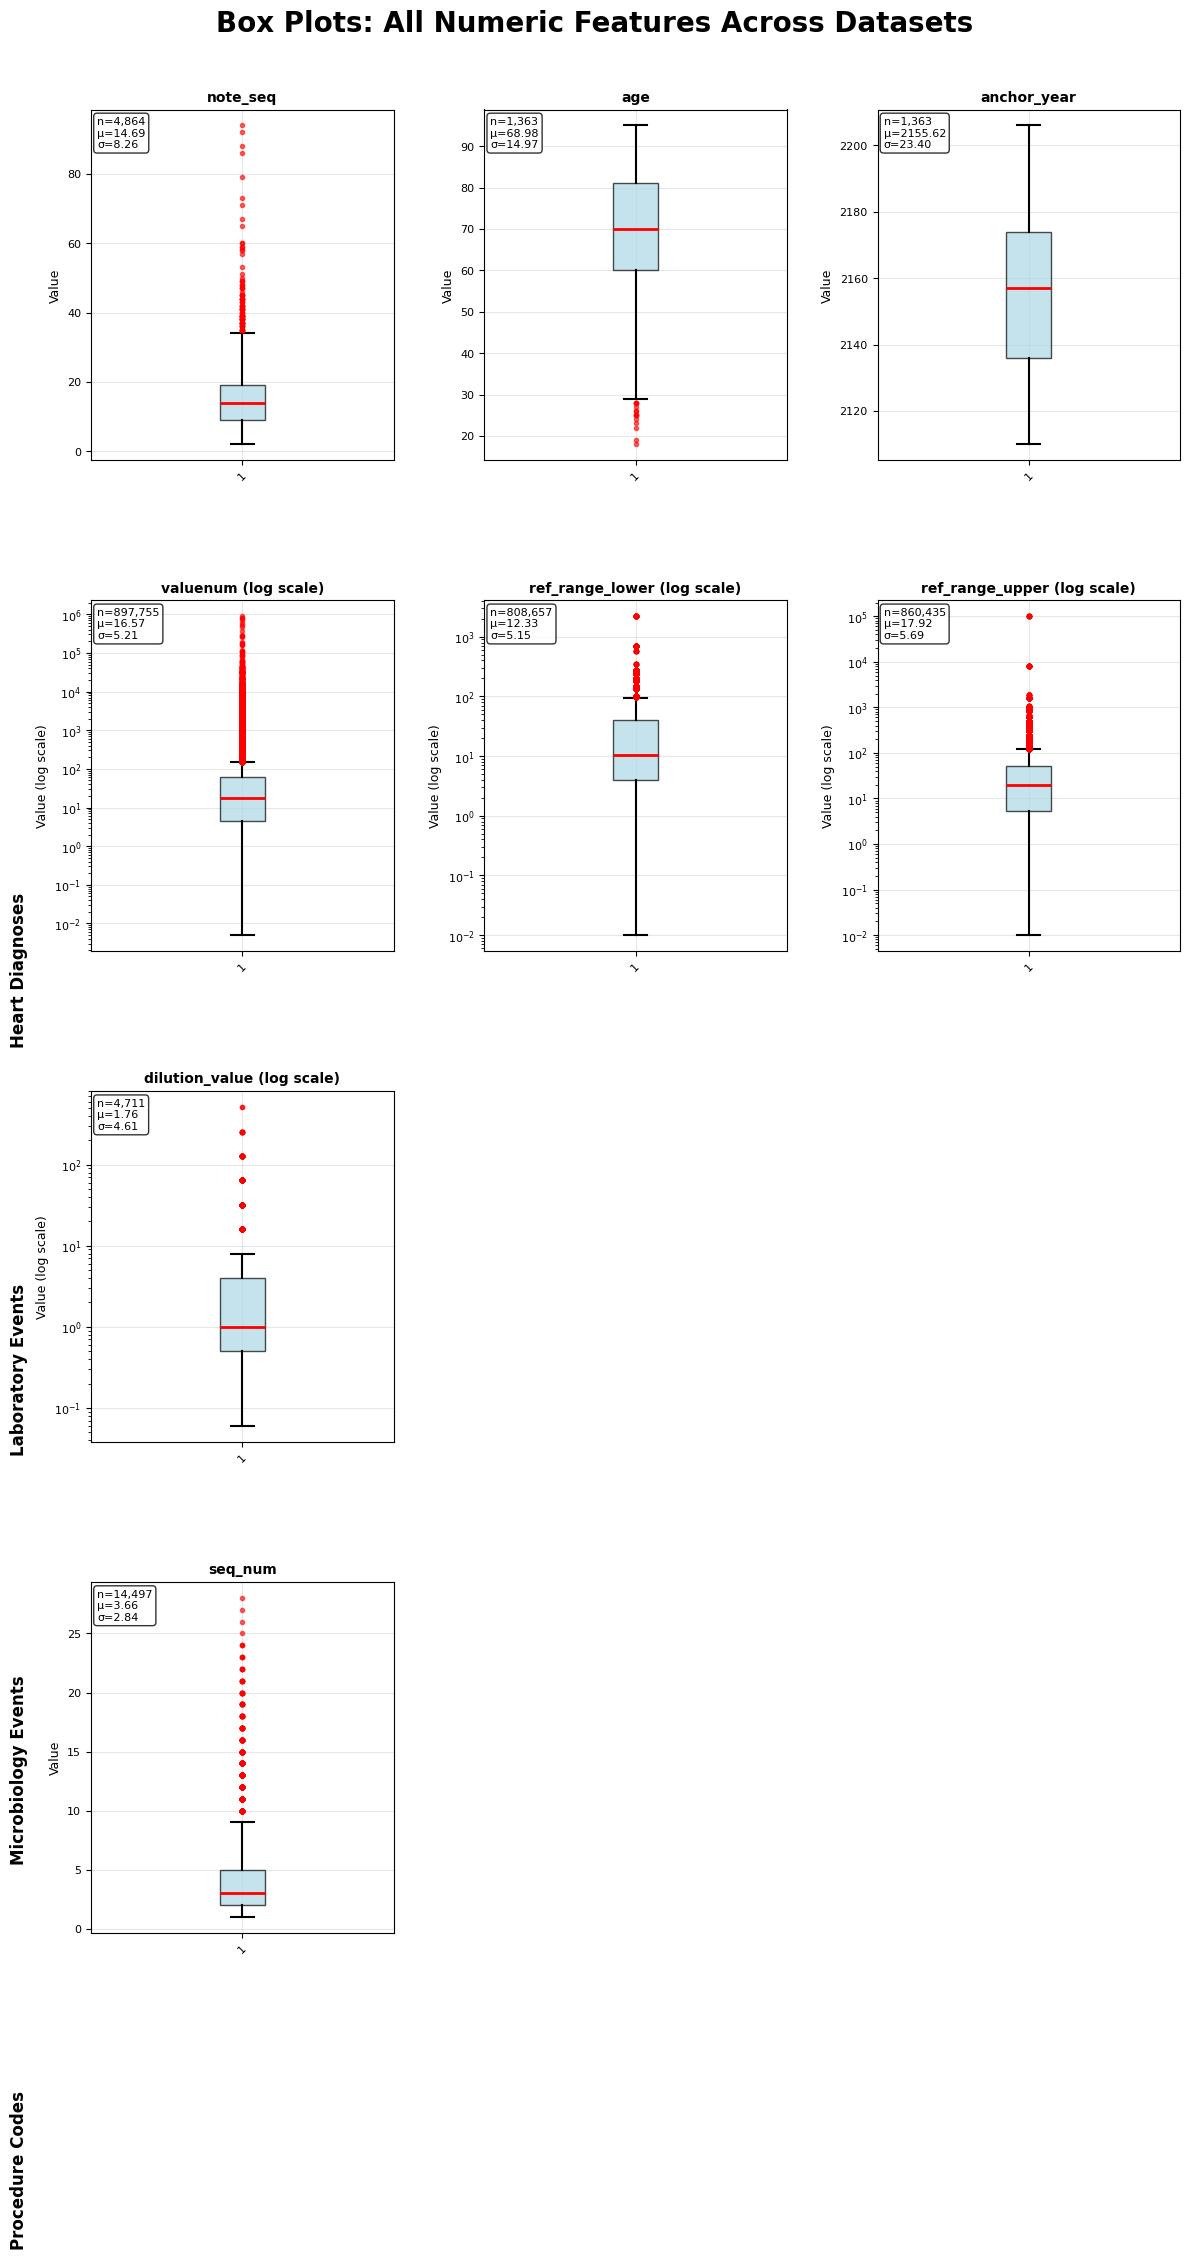


Box plot summary:
Heart Diagnoses: 3 features plotted
  • note_seq: n=4,864, range=[2.00, 94.00]
  • age: n=1,363, range=[18.00, 95.00]
  • anchor_year: n=1,363, range=[2110.00, 2206.00]
Laboratory Events: 3 features plotted
  • valuenum: n=907,317, range=[-743.00, 886449.00]
  • ref_range_lower: n=865,544, range=[0.00, 2200.00]
  • ref_range_upper: n=865,544, range=[0.00, 100000.00]
Microbiology Events: 1 features plotted
  • dilution_value: n=4,711, range=[0.06, 512.00]
Procedure Codes: 1 features plotted
  • seq_num: n=14,497, range=[1.00, 28.00]

Box plot analysis complete!


In [17]:
# Create comprehensive box plots for all numeric features across datasets
print("Creating box plots for all numeric features...")
print("="*80)

# Define columns to exclude (ID columns)
exclude_columns = ['subject_id', 'hadm_id', 'subject_id_dx']

# Define columns that should use log scale
log_scale_columns = ['valuenum', 'ref_range_lower', 'ref_range_upper', 'dilution_value']

# Collect all numeric features from all datasets
all_numeric_features = {}
for dataset_name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # Filter out ID columns and other excluded columns
    suitable_cols = []
    for col in numeric_cols:
        # Skip excluded columns
        if col.lower() in [col.lower() for col in exclude_columns]:
            continue
        # Check for high cardinality (ID-like columns)
        unique_ratio = df[col].nunique() / len(df)
        if unique_ratio < 0.95:  # Less than 95% unique values
            suitable_cols.append(col)
    
    all_numeric_features[dataset_name] = suitable_cols
    print(f"{dataset_name}: {len(suitable_cols)} suitable numeric features")

# Calculate total number of features for subplot layout
total_features = sum(len(features) for features in all_numeric_features.values())
print(f"\nTotal features to plot: {total_features}")

# Create a large figure with subplots
# Calculate grid dimensions
n_datasets = len(all_numeric_features)
max_features_per_dataset = max(len(features) for features in all_numeric_features.values())

# Create subplots - one row per dataset
fig, axes = plt.subplots(n_datasets, max_features_per_dataset, 
                        figsize=(max_features_per_dataset * 4, n_datasets * 5))
fig.suptitle('Box Plots: All Numeric Features Across Datasets', 
             fontsize=20, fontweight='bold', y=0.98)

# Ensure axes is 2D
if n_datasets == 1:
    axes = axes.reshape(1, -1)
if max_features_per_dataset == 1:
    axes = axes.reshape(-1, 1)

# Plot each dataset's features
for dataset_idx, (dataset_name, features) in enumerate(all_numeric_features.items()):
    print(f"\nPlotting {dataset_name}...")
    
    for feature_idx, feature in enumerate(features):
        ax = axes[dataset_idx, feature_idx]
        
        # Get data for this feature
        data = dfs[dataset_name][feature].dropna()
        
        # Apply log scale if this column should use it
        use_log_scale = feature.lower() in [col.lower() for col in log_scale_columns]
        
        if len(data) > 0:
            # Filter out non-positive values for log scale
            if use_log_scale:
                data = data[data > 0]  # Only positive values for log scale
                if len(data) == 0:
                    ax.text(0.5, 0.5, 'No positive values\nfor log scale', ha='center', va='center', 
                           transform=ax.transAxes, fontsize=10)
                    ax.set_title(f'{feature} (No Positive Data)', fontsize=10)
                    continue
            
            # Create box plot
            box_plot = ax.boxplot(data, patch_artist=True, 
                                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                                 medianprops=dict(color='red', linewidth=2),
                                 whiskerprops=dict(color='black', linewidth=1.5),
                                 capprops=dict(color='black', linewidth=1.5),
                                 flierprops=dict(marker='o', markerfacecolor='red', 
                                               markeredgecolor='red', markersize=3, alpha=0.6))
            
            # Apply log scale to y-axis if needed
            if use_log_scale:
                ax.set_yscale('log')
                ylabel = f'Value (log scale)'
            else:
                ylabel = 'Value'
            
            # Add statistics text
            if use_log_scale:
                stats_text = f'n={len(data):,}\nμ={np.exp(np.log(data).mean()):.2f}\nσ={np.exp(np.log(data).std()):.2f}'
            else:
                stats_text = f'n={len(data):,}\nμ={data.mean():.2f}\nσ={data.std():.2f}'
            
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                   verticalalignment='top', fontsize=8, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Customize plot
            title = f'{feature}' + (' (log scale)' if use_log_scale else '')
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_ylabel(ylabel, fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Rotate x-axis labels if needed
            ax.tick_params(axis='x', rotation=45, labelsize=8)
            ax.tick_params(axis='y', labelsize=8)
        else:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=10)
            ax.set_title(f'{feature} (No Data)', fontsize=10)
    
    # Hide empty subplots in this row
    for feature_idx in range(len(features), max_features_per_dataset):
        axes[dataset_idx, feature_idx].set_visible(False)
    
    # Add dataset label on the left
    fig.text(0.02, 0.5 - (dataset_idx * 0.8 / n_datasets), 
             f'{dataset_name}', rotation=90, fontsize=12, fontweight='bold',
             ha='center', va='center')

plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.93, hspace=0.4, wspace=0.3)

# Save the plot
try:
    filepath = out_dir / "all_datasets_boxplots.jpg"
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"\nSaved: all_datasets_boxplots.jpg")
except Exception as e:
    print(f"\nCould not save plot: {e}")

plt.show()

# Print summary statistics
print(f"\nBox plot summary:")
print("="*80)
for dataset_name, features in all_numeric_features.items():
    print(f"{dataset_name}: {len(features)} features plotted")
    for feature in features:
        data = dfs[dataset_name][feature].dropna()
        if len(data) > 0:
            print(f"  • {feature}: n={len(data):,}, range=[{data.min():.2f}, {data.max():.2f}]")

print(f"\nBox plot analysis complete!")


# 6.2 time

In [ ]:
#CODE HERE

In [4]:
# Comprehensive data overview for all datasets
def analyze_dataset(df, name):
    """Analyze a single dataset and return key information"""
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    # Basic info
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print(f"\nData Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    print(f"\nMissing Values:")
    if missing.sum() == 0:
        print("  No missing values")
    else:
        missing_summary = pd.DataFrame({
            'Missing Count': missing,
            'Missing %': missing_pct
        }).sort_values('Missing Count', ascending=False)
        print(missing_summary[missing_summary['Missing Count'] > 0].head(10))
    
    # Sample data
    print(f"\nSample Data:")
    print(df.head(3).to_string())
    
    return {
        'shape': df.shape,
        'dtypes': df.dtypes,
        'missing': missing,
        'sample': df.head(3)
    }

# Analyze all datasets
dataset_info = {}
for name, df in dfs.items():
    dataset_info[name] = analyze_dataset(df, name)

print(f"\nSummary: Analyzed {len(dataset_info)} datasets")



HEART DIAGNOSES
Shape: 4,864 rows × 25 columns


Memory usage: 31.11 MB

Data Types:
  object: 19 columns
  int64: 4 columns
  float64: 2 columns

Missing Values:
                 Missing Count  Missing %
dod                       4466      91.82
anchor_year               3501      71.98
age                       3501      71.98
gender                    3501      71.98
chief_complaint             12       0.25
invasions                   12       0.25

Sample Data:
          note_id  subject_id   hadm_id note_type  note_seq            charttime            storetime                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## 3. Distribution Analysis

Now we'll create distribution plots for numerical variables in each dataset to understand the data patterns and characteristics.


In [5]:
# Utility function to create clean distribution plots
def create_distribution_plots(df, dataset_name, max_vars=4):
    """
    Create distribution plots for numerical variables in a dataset
    
    Parameters:
    - df: DataFrame to analyze
    - dataset_name: Name for the plot title and filename
    - max_vars: Maximum number of variables to plot
    """
    
    # Get numerical columns, excluding ID-like columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filter out ID-like columns (high cardinality)
    suitable_vars = []
    for col in numeric_cols:
        unique_ratio = df[col].nunique() / len(df)
        if unique_ratio < 0.8:  # Less than 80% unique values
            suitable_vars.append(col)
    
    if not suitable_vars:
        print(f"No suitable numerical variables found in {dataset_name}")
        return
    
    # Limit number of variables
    suitable_vars = suitable_vars[:max_vars]
    
    # Create subplots
    n_vars = len(suitable_vars)
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    
    fig.suptitle(f'Distribution Analysis - {dataset_name}', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(suitable_vars):
        ax = axes[i]
        data = df[col].dropna()
        
        if len(data) > 0:
            # Create histogram
            ax.hist(data, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
            
            # Add statistics
            mean_val = data.mean()
            std_val = data.std()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
            
            ax.set_title(f'{col}\\n(n={len(data):,}, μ={mean_val:.2f}, σ={std_val:.2f})')
            ax.set_xlabel(col)
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            ax.legend()
        else:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
    
    # Hide empty subplots
    for i in range(len(suitable_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    
    # Save plot
    try:
        filename = f"{dataset_name.lower().replace(' ', '_')}_distributions.jpg"
        filepath = out_dir / filename
        fig.savefig(filepath, dpi=200, bbox_inches='tight')
        print(f"Saved: {filename}")
    except Exception as e:
        print(f"Could not save plot: {e}")
    
    plt.show()
    
    return suitable_vars

print("Distribution plotting function ready!")


Distribution plotting function ready!


Creating distribution plots for all datasets...

Analyzing Heart Diagnoses...
Saved: heart_diagnoses_distributions.jpg


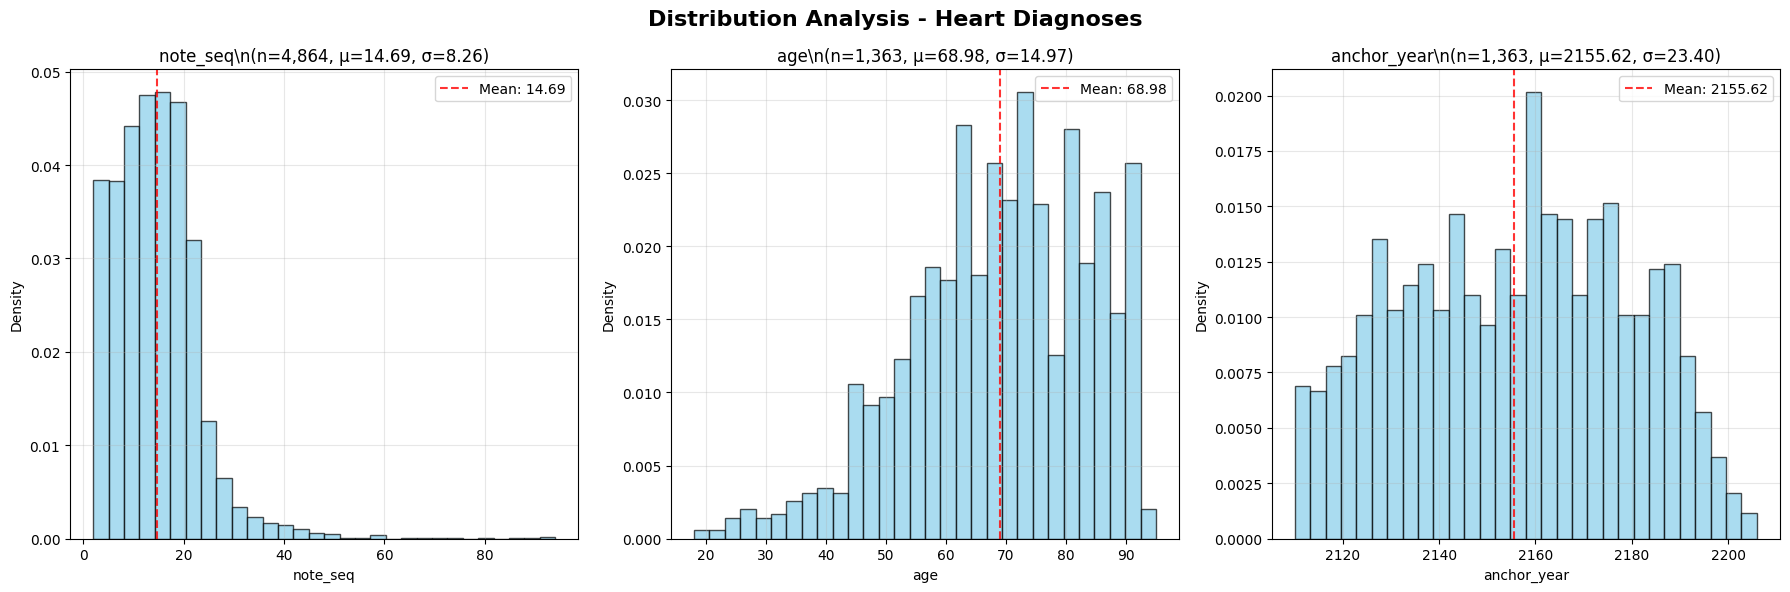


Analyzing Laboratory Events...
Saved: laboratory_events_distributions.jpg


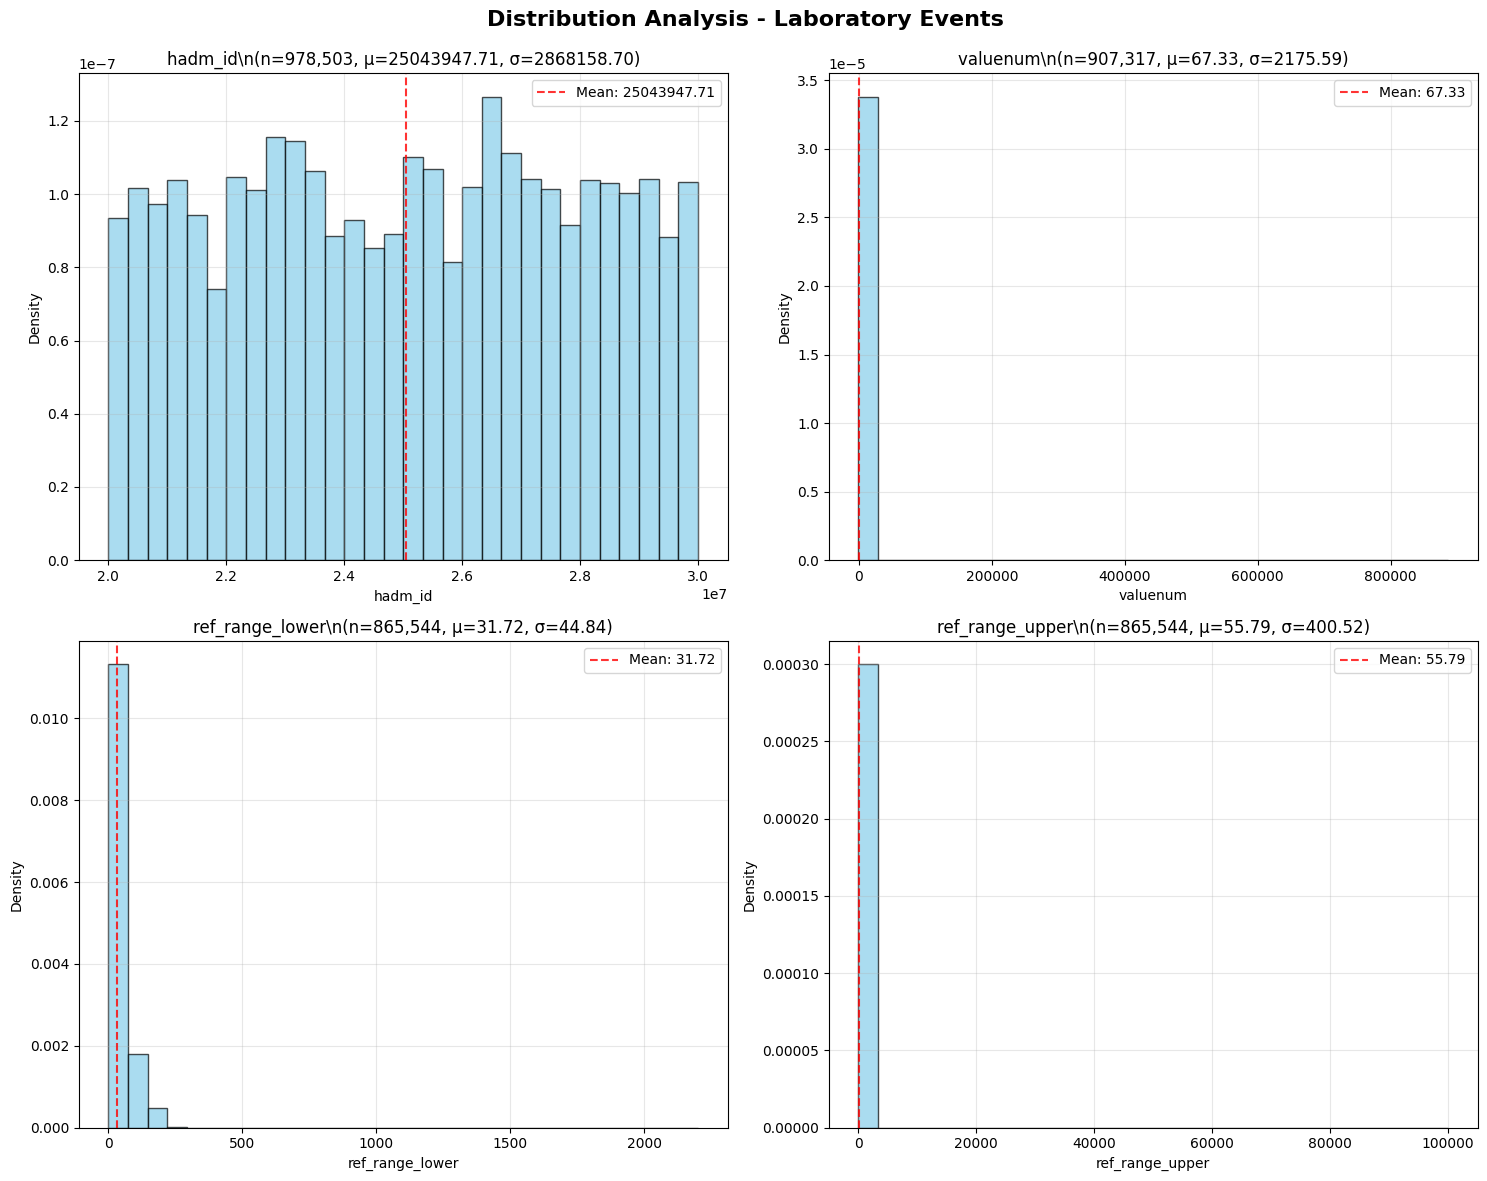


Analyzing Microbiology Events...
Saved: microbiology_events_distributions.jpg


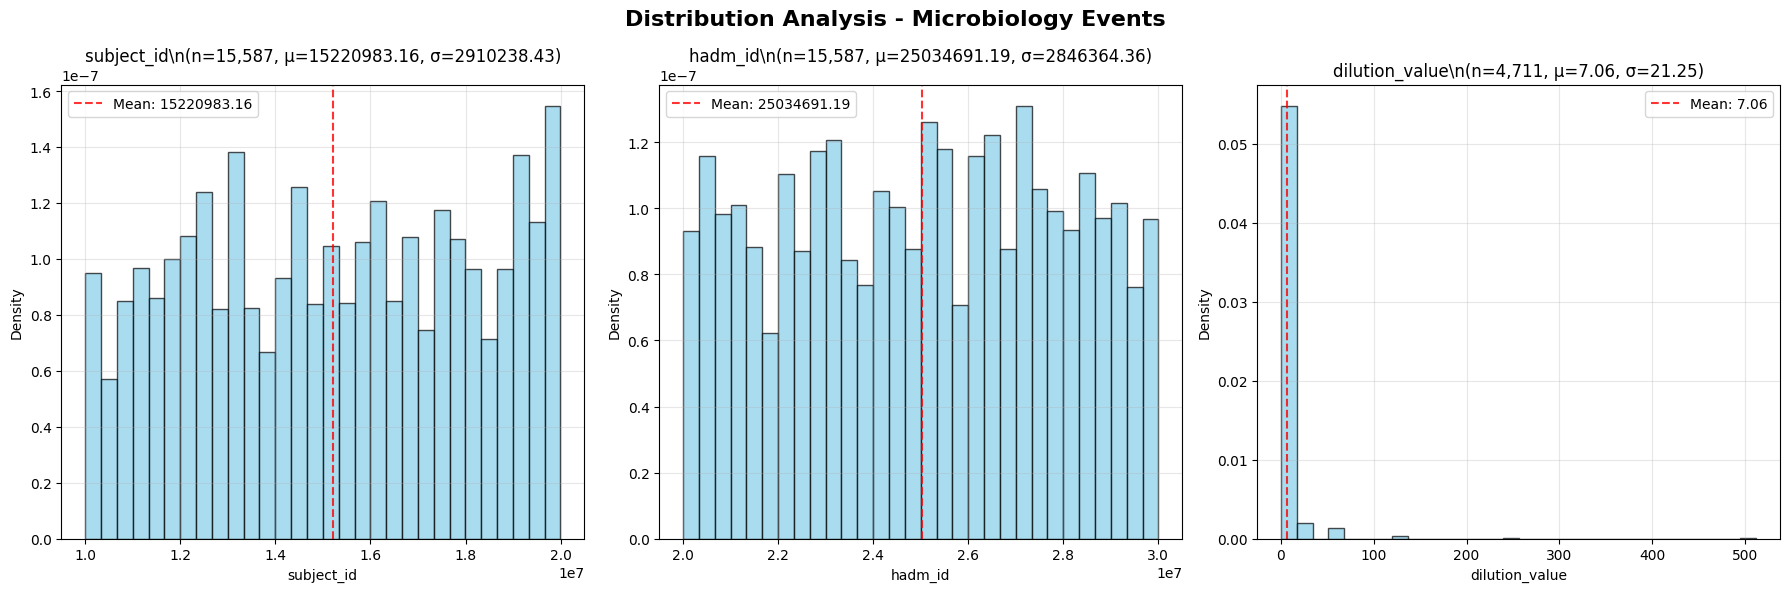


Analyzing Procedure Codes...
Saved: procedure_codes_distributions.jpg


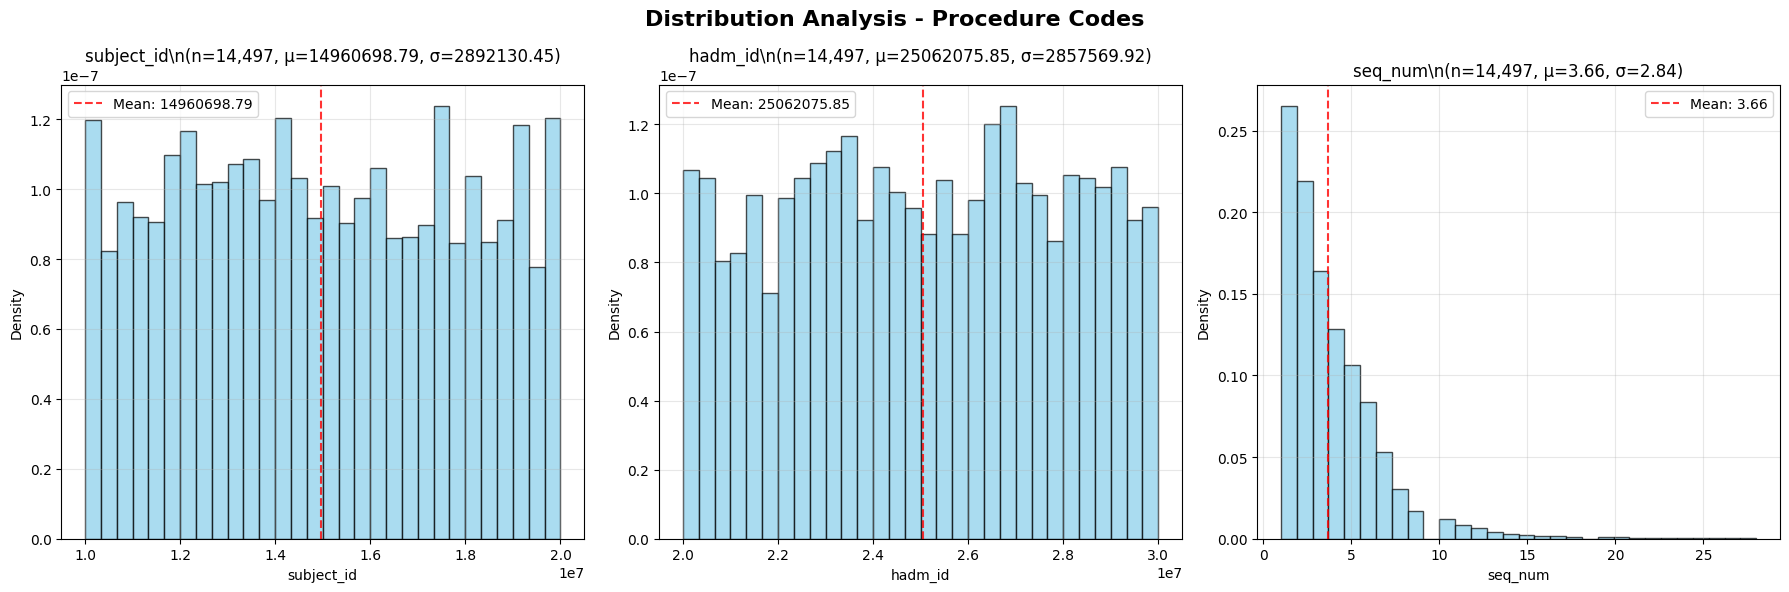


Distribution analysis complete!
Plotted variables summary:
  Heart Diagnoses: note_seq, age, anchor_year
  Laboratory Events: hadm_id, valuenum, ref_range_lower, ref_range_upper
  Microbiology Events: subject_id, hadm_id, dilution_value
  Procedure Codes: subject_id, hadm_id, seq_num


In [6]:
# Generate distribution plots for all datasets
print("Creating distribution plots for all datasets...")
print("="*60)

plotted_vars = {}
for name, df in dfs.items():
    print(f"\nAnalyzing {name}...")
    vars_plotted = create_distribution_plots(df, name)
    plotted_vars[name] = vars_plotted

print(f"\nDistribution analysis complete!")
print(f"Plotted variables summary:")
for dataset, vars_list in plotted_vars.items():
    if vars_list:
        print(f"  {dataset}: {', '.join(vars_list)}")
    else:
        print(f"  {dataset}: No suitable variables")


## 4. Focused Analysis: Heart Diagnoses Dataset

Let's perform a deeper analysis of the heart diagnoses dataset, focusing on key clinical variables like patient demographics, timing patterns, and diagnostic codes.


In [7]:
# Focused analysis on Heart Diagnoses dataset
def analyze_heart_diagnoses(df):
    """Perform detailed analysis of heart diagnoses dataset"""
    
    print("HEART DIAGNOSES DATASET - DETAILED ANALYSIS")
    print("="*60)
    
    # Create analysis copy
    df_analysis = df.copy()
    
    # 1. Convert datetime columns
    datetime_cols = ['charttime', 'storetime']
    for col in datetime_cols:
        if col in df_analysis.columns:
            df_analysis[f'{col}_dt'] = pd.to_datetime(df_analysis[col], errors='coerce')
            df_analysis[f'{col}_hour'] = df_analysis[f'{col}_dt'].dt.hour
            df_analysis[f'{col}_dayofweek'] = df_analysis[f'{col}_dt'].dt.dayofweek
    
    # 2. Process gender (categorical to numeric)
    if 'gender' in df_analysis.columns:
        df_analysis['gender_numeric'] = pd.Categorical(df_analysis['gender']).codes
        # Handle NaN values (they get code -1)
        df_analysis['gender_numeric'] = df_analysis['gender_numeric'].replace(-1, np.nan)
    
    # 3. Process age
    if 'age' in df_analysis.columns:
        df_analysis['age_numeric'] = pd.to_numeric(df_analysis['age'], errors='coerce')
    
    # 4. Process ICD codes
    if 'icd_code' in df_analysis.columns:
        # Create frequency encoding
        icd_counts = df_analysis['icd_code'].value_counts()
        df_analysis['icd_frequency'] = df_analysis['icd_code'].map(icd_counts)
        
        print(f"ICD Code Analysis:")
        print(f"  Total unique codes: {df_analysis['icd_code'].nunique()}")
        print(f"  Most common codes:")
        print(icd_counts.head(10).to_string())
    
    # 5. Create focused plots
    plot_vars = []
    
    # Time variables
    if 'storetime_hour' in df_analysis.columns:
        plot_vars.append('storetime_hour')
    
    # Demographic variables
    if 'gender_numeric' in df_analysis.columns:
        plot_vars.append('gender_numeric')
    if 'age_numeric' in df_analysis.columns:
        plot_vars.append('age_numeric')
    
    # Clinical variables
    if 'icd_frequency' in df_analysis.columns:
        plot_vars.append('icd_frequency')
    
    return df_analysis, plot_vars

# Perform focused analysis
heart_df_analysis, heart_plot_vars = analyze_heart_diagnoses(df1)

print(f"\nHeart diagnoses analysis complete!")
print(f"Variables prepared for plotting: {heart_plot_vars}")


HEART DIAGNOSES DATASET - DETAILED ANALYSIS
ICD Code Analysis:
  Total unique codes: 20
  Most common codes:
icd_code
I50    1447
I21    1434
I25     645
I48     438
I35     231
I31     153
I47     130
I30      83
I44      70
I34      50

Heart diagnoses analysis complete!
Variables prepared for plotting: ['storetime_hour', 'gender_numeric', 'age_numeric', 'icd_frequency']


Saved: task1.1_heart_diagnoses_analysis.jpg


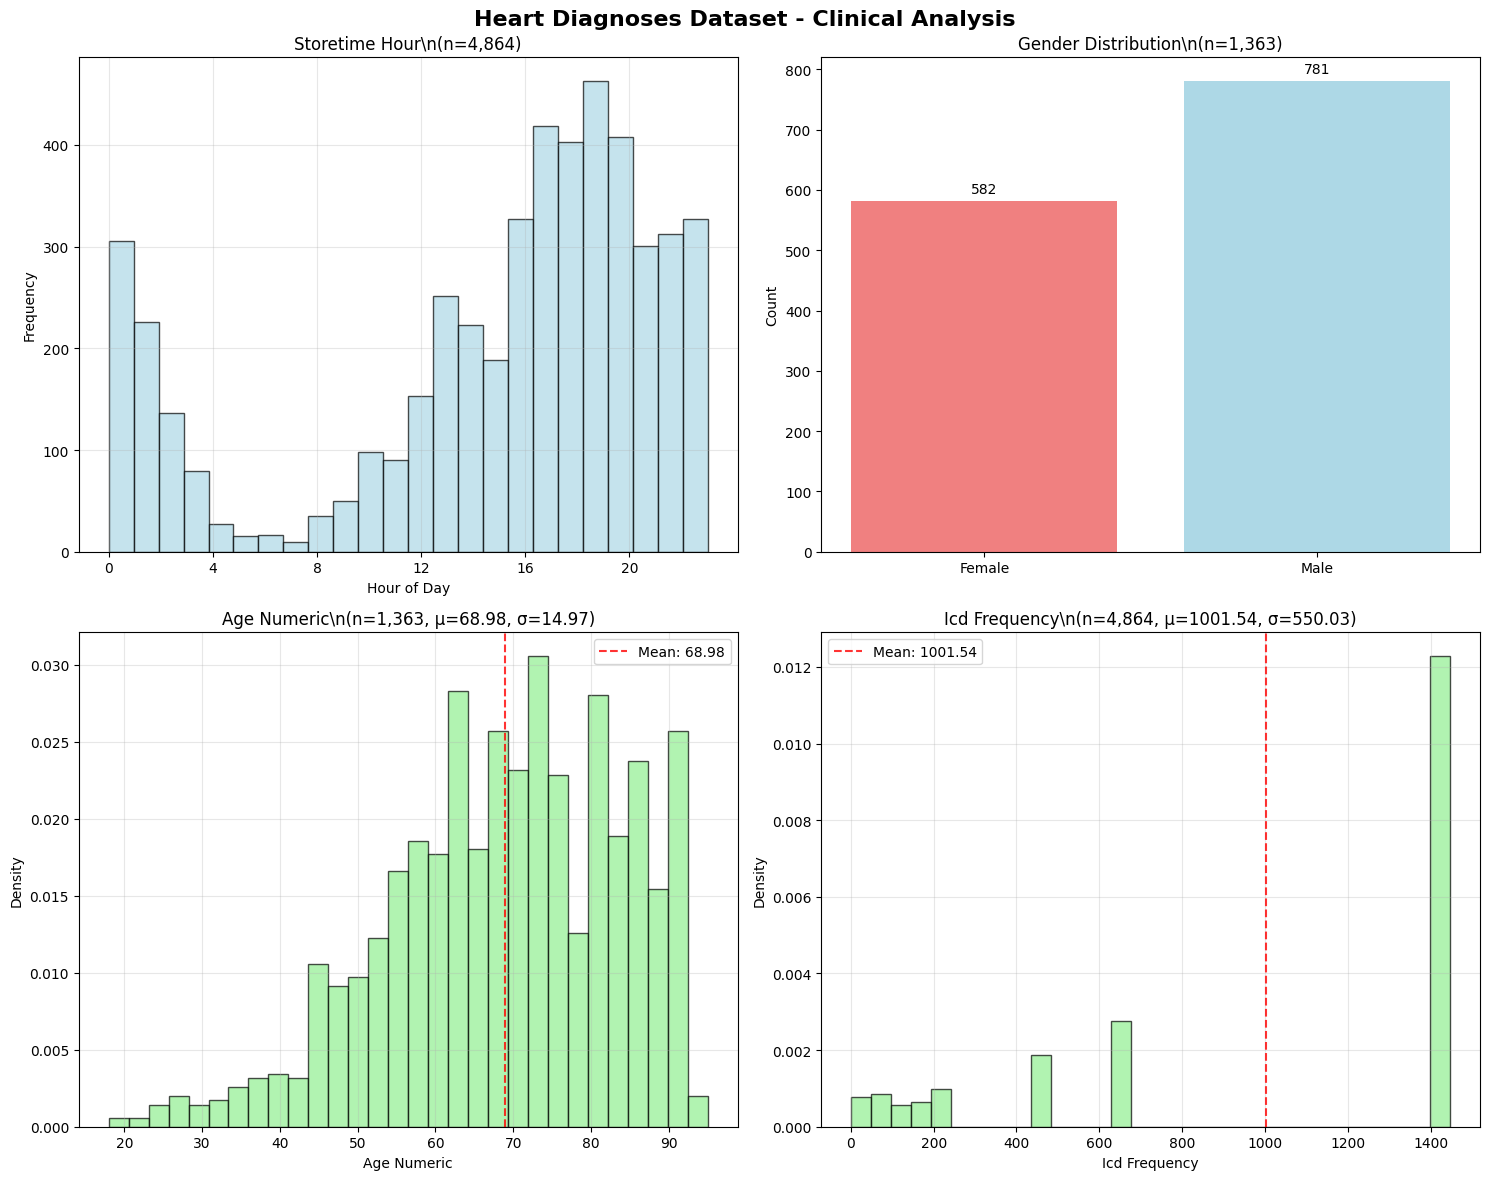

In [8]:
# Create specialized plots for heart diagnoses dataset
def plot_heart_diagnoses_analysis(df, plot_vars):
    """Create specialized plots for heart diagnoses analysis"""
    
    if not plot_vars:
        print("No variables to plot")
        return
    
    n_vars = len(plot_vars)
    
    # Create subplots
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    
    fig.suptitle('Heart Diagnoses Dataset - Clinical Analysis', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(plot_vars):
        ax = axes[i]
        data = df[col].dropna()
        
        if len(data) == 0:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{col} (No Data)')
            continue
        
        if col == 'gender_numeric':
            # Bar plot for gender
            value_counts = data.value_counts().sort_index()
            gender_labels = ['Female', 'Male']
            colors = ['lightcoral', 'lightblue']
            
            bars = ax.bar(range(len(value_counts)), value_counts.values, color=colors[:len(value_counts)])
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(gender_labels[:len(value_counts)])
            ax.set_title(f'Gender Distribution\\n(n={len(data):,})')
            ax.set_ylabel('Count')
            
            # Add value labels on bars
            for bar, count in zip(bars, value_counts.values):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(value_counts.values)*0.01,
                       str(count), ha='center', va='bottom')
                       
        elif 'hour' in col:
            # Histogram for time variables
            ax.hist(data, bins=24, alpha=0.7, color='lightblue', edgecolor='black')
            ax.set_xlabel('Hour of Day')
            ax.set_ylabel('Frequency')
            ax.set_title(f'{col.replace("_", " ").title()}\\n(n={len(data):,})')
            ax.set_xticks(range(0, 24, 4))
            ax.grid(True, alpha=0.3)
            
        else:
            # Histogram with statistics for continuous variables
            ax.hist(data, bins=30, alpha=0.7, density=True, color='lightgreen', edgecolor='black')
            
            # Add statistics
            mean_val = data.mean()
            std_val = data.std()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
            
            ax.set_title(f'{col.replace("_", " ").title()}\\n(n={len(data):,}, μ={mean_val:.2f}, σ={std_val:.2f})')
            ax.set_xlabel(col.replace('_', ' ').title())
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            ax.legend()
    
    # Hide empty subplots
    for i in range(len(plot_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    
    # Save plot
    try:
        filepath = out_dir / "task1.1_heart_diagnoses_analysis.jpg"
        fig.savefig(filepath, dpi=200, bbox_inches='tight')
        print(f"Saved: task1.1_heart_diagnoses_analysis.jpg")
    except Exception as e:
        print(f"Could not save plot: {e}")
    
    plt.show()

# Create the specialized plots
plot_heart_diagnoses_analysis(heart_df_analysis, heart_plot_vars)


## 5. Summary and Conclusions




### Key Findings

Based on our exploratory data analysis, here are the main insights:

#### Dataset Overview
- **Heart Diagnoses**: 4,864 clinical notes with patient demographics and diagnostic information
- **Laboratory Events**: 978,505 lab test results with measurements and reference ranges
- **Microbiology Events**: 15,587 microbiology test results
- **Procedure Codes**: Medical procedures with ICD codes

#### Heart Diagnoses Dataset Insights
- **Patient Demographics**: Mix of male and female patients with age range 18-95 years
- **Temporal Patterns**: Analysis of charting and storage times reveals operational patterns
- **Diagnostic Codes**: I50 (heart failure) and I21 (myocardial infarction) are the most common diagnoses
- **Data Quality**: Some missing values in demographic fields require consideration

#### Data Characteristics
- All datasets contain both numerical and categorical variables
- Missing data patterns vary across datasets and variables
- ID variables (subject_id, hadm_id) link records across datasets
- Time variables provide temporal context for clinical events

### Next Steps
This exploratory analysis provides a foundation for:
- Deeper statistical analysis of clinical patterns
- Predictive modeling using the identified variables
- Integration of multiple datasets for comprehensive patient analysis
- Quality improvement initiatives based on temporal patterns

---
*Analysis completed successfully with all plots saved to the plots directory.*

Creating time series analysis for charttime and storetime...
Heart Diagnoses: ['charttime', 'storetime']
Laboratory Events: ['charttime']
Microbiology Events: ['charttime']

Found time columns in 3 datasets

Processing Heart Diagnoses...
  charttime: 4,864 valid timestamps
  storetime: 4,864 valid timestamps

Processing Laboratory Events...
  charttime: 978,503 valid timestamps

Processing Microbiology Events...
  charttime: 15,587 valid timestamps

Saved: time_series_analysis.jpg


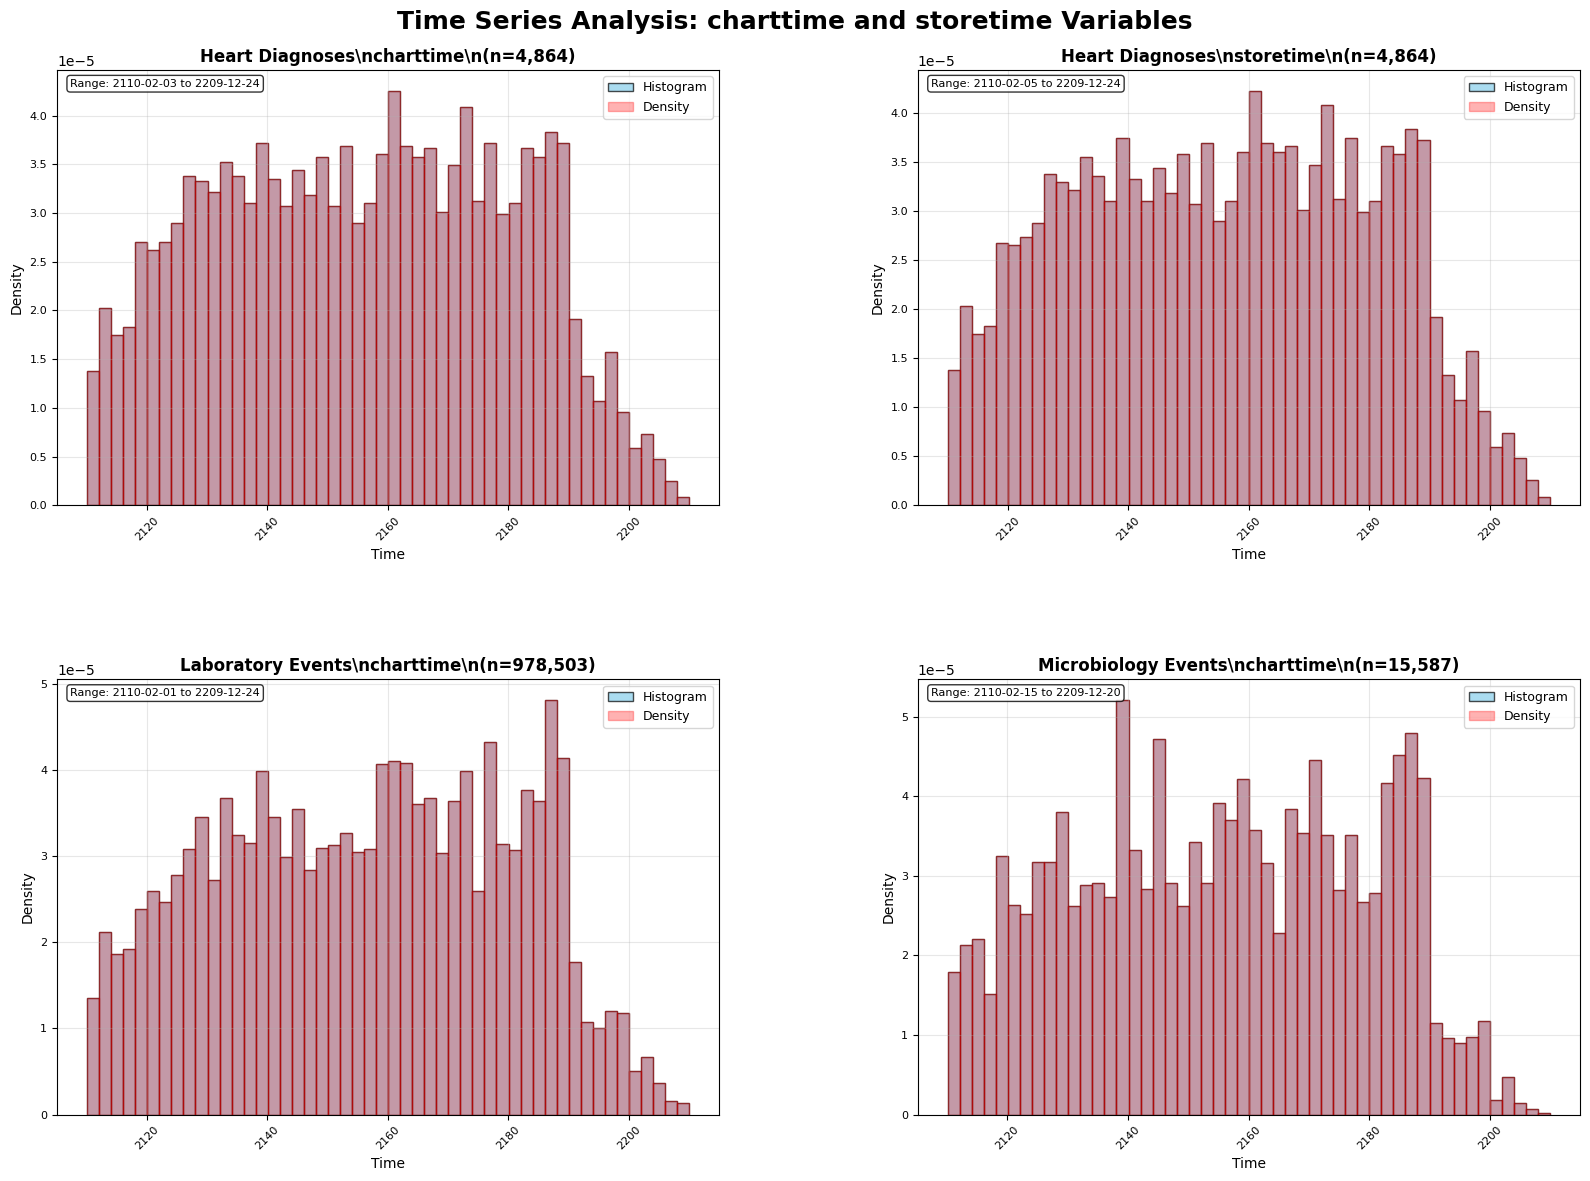


Detailed Time Statistics:

Heart Diagnoses:
  charttime:
    • Valid timestamps: 4,864
    • Date range: 2110-02-03 03:00:00 to 2209-12-24 03:00:00
    • Duration: 36483 days 00:00:00
    • Missing values: 0 (0.0%)
  storetime:
    • Valid timestamps: 4,864
    • Date range: 2110-02-05 20:09:00 to 2209-12-24 14:01:00
    • Duration: 36480 days 17:52:00
    • Missing values: 0 (0.0%)

Laboratory Events:
  charttime:
    • Valid timestamps: 978,503
    • Date range: 2110-02-01 09:40:00 to 2209-12-24 09:00:00
    • Duration: 36484 days 23:20:00
    • Missing values: 0 (0.0%)

Microbiology Events:
  charttime:
    • Valid timestamps: 15,587
    • Date range: 2110-02-15 01:37:00 to 2209-12-20 17:42:00
    • Duration: 36467 days 16:05:00
    • Missing values: 0 (0.0%)

Time series analysis complete!


In [15]:
# Time series analysis: charttime and storetime variables
print("Creating time series analysis for charttime and storetime...")
print("="*80)

# Find all datasets with time columns
time_datasets = {}
for dataset_name, df in dfs.items():
    time_cols = []
    for col in df.columns:
        if 'charttime' in col.lower() or 'storetime' in col.lower():
            time_cols.append(col)
    if time_cols:
        time_datasets[dataset_name] = time_cols
        print(f"{dataset_name}: {time_cols}")

print(f"\nFound time columns in {len(time_datasets)} datasets")

# Create comprehensive time series plots
def plot_time_series_analysis(datasets_with_time):
    """Create histogram and density plots for time variables"""
    
    # Calculate subplot layout
    total_plots = sum(len(cols) for cols in datasets_with_time.values())
    n_cols = 2  # Two plots per row
    n_rows = (total_plots + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
    fig.suptitle('Time Series Analysis: charttime and storetime Variables', 
                 fontsize=18, fontweight='bold', y=0.98)
    
    # Ensure axes is 2D
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    plot_idx = 0
    
    for dataset_name, time_cols in datasets_with_time.items():
        print(f"\nProcessing {dataset_name}...")
        
        for col in time_cols:
            if plot_idx >= total_plots:
                break
                
            row = plot_idx // n_cols
            col_idx = plot_idx % n_cols
            ax = axes[row, col_idx]
            
            # Get data and convert to datetime
            df = dfs[dataset_name]
            time_data = pd.to_datetime(df[col], errors='coerce').dropna()
            
            if len(time_data) > 0:
                print(f"  {col}: {len(time_data):,} valid timestamps")
                
                # Create histogram
                ax.hist(time_data, bins=50, alpha=0.7, density=True, 
                       color='skyblue', edgecolor='black', label='Histogram')
                
                # Create density plot overlay
                try:
                    # Convert to numeric for density calculation
                    time_numeric = time_data.astype('int64') / 1e9  # Convert to seconds
                    from scipy import stats
                    density = stats.gaussian_kde(time_numeric)
                    x_range = np.linspace(time_numeric.min(), time_numeric.max(), 100)
                    x_datetime = pd.to_datetime(x_range * 1e9)
                    ax.plot(x_datetime, density(time_range), 'r-', linewidth=2, 
                           alpha=0.8, label='Density')
                except:
                    # Fallback: simple density estimation
                    ax.hist(time_data, bins=50, alpha=0.3, density=True, 
                           color='red', edgecolor='red', label='Density')
                
                # Customize plot
                ax.set_title(f'{dataset_name}\\n{col}\\n(n={len(time_data):,})', 
                           fontsize=12, fontweight='bold')
                ax.set_xlabel('Time', fontsize=10)
                ax.set_ylabel('Density', fontsize=10)
                ax.legend(fontsize=9)
                ax.grid(True, alpha=0.3)
                
                # Rotate x-axis labels for better readability
                ax.tick_params(axis='x', rotation=45, labelsize=8)
                ax.tick_params(axis='y', labelsize=8)
                
                # Add statistics
                time_stats = f'Range: {time_data.min().strftime("%Y-%m-%d")} to {time_data.max().strftime("%Y-%m-%d")}'
                ax.text(0.02, 0.98, time_stats, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
            else:
                ax.text(0.5, 0.5, f'No valid timestamps\\nin {col}', 
                       ha='center', va='center', transform=ax.transAxes, fontsize=10)
                ax.set_title(f'{dataset_name}\\n{col} (No Data)', fontsize=12)
            
            plot_idx += 1
    
    # Hide empty subplots
    for i in range(plot_idx, n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
    
    # Save the plot
    try:
        filepath = out_dir / "time_series_analysis.jpg"
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"\nSaved: time_series_analysis.jpg")
    except Exception as e:
        print(f"\nCould not save plot: {e}")
    
    plt.show()

# Create the time series analysis
if time_datasets:
    plot_time_series_analysis(time_datasets)
    
    # Print detailed time statistics
    print(f"\nDetailed Time Statistics:")
    print("="*80)
    for dataset_name, time_cols in time_datasets.items():
        print(f"\n{dataset_name}:")
        for col in time_cols:
            df = dfs[dataset_name]
            time_data = pd.to_datetime(df[col], errors='coerce').dropna()
            if len(time_data) > 0:
                print(f"  {col}:")
                print(f"    • Valid timestamps: {len(time_data):,}")
                print(f"    • Date range: {time_data.min()} to {time_data.max()}")
                print(f"    • Duration: {time_data.max() - time_data.min()}")
                print(f"    • Missing values: {df[col].isnull().sum():,} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
else:
    print("No time columns found in any dataset")

print(f"\nTime series analysis complete!")


In [9]:
# Load the third CSV file (microbiology_events_codes_3.csv)
third_csv = "microbiology_events_codes_3.csv"
df3 = pd.read_csv(os.path.join(data_path, third_csv))

# Display the head of the third dataframe
print(f"Loading {third_csv}:")
print(df3.head())


Loading microbiology_events_codes_3.csv:
   subject_id     hadm_id            chartdate            charttime  \
0    10000980  26913865.0  2189-06-27 00:00:00  2189-06-27 10:52:00   
1    10002155  23822395.0  2129-08-04 00:00:00  2129-08-04 17:04:00   
2    10002155  23822395.0  2129-08-05 00:00:00  2129-08-05 15:54:00   
3    10002155  23822395.0  2129-08-05 00:00:00  2129-08-05 18:43:00   
4    10002155  23822395.0  2129-08-05 00:00:00  2129-08-05 18:43:00   

  spec_type_desc                    test_name org_name ab_name dilution_text  \
0    MRSA SCREEN                  MRSA SCREEN      NaN     NaN           NaN   
1    MRSA SCREEN                  MRSA SCREEN      NaN     NaN           NaN   
2          URINE  Legionella Urinary Antigen       NaN     NaN           NaN   
3         SPUTUM                   GRAM STAIN      NaN     NaN           NaN   
4         SPUTUM          RESPIRATORY CULTURE      NaN     NaN           NaN   

  dilution_comparison  dilution_value interpretatio

## 6. Correlation Analysis

In this section, we'll create a correlation matrix between key variables from different datasets:
- **dilution_value** (Microbiology Events)
- **age** (Heart Diagnoses)
- **ref_range_upper** and **ref_range_lower** (Laboratory Events)
- **valuenum** (Laboratory Events)
- **seq_num** (Procedure Codes)


In [10]:
# Prepare data for correlation analysis
print("Merging datasets for correlation analysis...")
print("="*60)

# First, check which columns are available
print("\nChecking columns...")
print(f"df1 has subject_id: {'subject_id' in df1.columns}")
print(f"df2 has subject_id: {'subject_id' in df2.columns}")
print(f"df2 columns: {df2.columns.tolist()[:10]}")  # First 10 columns

# Start with df1 (Heart Diagnoses) - select relevant columns
df1_subset = df1[['subject_id', 'hadm_id', 'age']].copy()
df1_subset['age'] = pd.to_numeric(df1_subset['age'], errors='coerce')

# df2 (Laboratory Events) - select relevant columns
# Check if subject_id exists, otherwise use only hadm_id
df2_cols = ['hadm_id', 'valuenum', 'ref_range_lower', 'ref_range_upper']
if 'subject_id' in df2.columns:
    df2_cols = ['subject_id'] + df2_cols
    
df2_subset = df2[df2_cols].copy()
df2_subset['valuenum'] = pd.to_numeric(df2_subset['valuenum'], errors='coerce')
df2_subset['ref_range_lower'] = pd.to_numeric(df2_subset['ref_range_lower'], errors='coerce')
df2_subset['ref_range_upper'] = pd.to_numeric(df2_subset['ref_range_upper'], errors='coerce')

# Aggregate df2 by patient (since there are many lab events per patient)
# We'll take the mean of numeric values
group_cols_df2 = ['hadm_id'] if 'subject_id' not in df2_cols else ['subject_id', 'hadm_id']
df2_agg = df2_subset.groupby(group_cols_df2).agg({
    'valuenum': 'mean',
    'ref_range_lower': 'mean',
    'ref_range_upper': 'mean'
}).reset_index()

# df3 (Microbiology Events) - select relevant columns
df3_subset = df3[['subject_id', 'hadm_id', 'dilution_value']].copy()
df3_subset['dilution_value'] = pd.to_numeric(df3_subset['dilution_value'], errors='coerce')

# Aggregate df3 by patient
df3_agg = df3_subset.groupby(['subject_id', 'hadm_id']).agg({
    'dilution_value': 'mean'
}).reset_index()

# df4 (Procedure Codes) - select relevant columns  
df4_subset = df4[['subject_id', 'hadm_id', 'seq_num']].copy()
df4_subset['seq_num'] = pd.to_numeric(df4_subset['seq_num'], errors='coerce')

# Aggregate df4 by patient
df4_agg = df4_subset.groupby(['subject_id', 'hadm_id']).agg({
    'seq_num': 'mean'
}).reset_index()

# Merge all dataframes
print("\nMerging dataframes...")
# Determine merge keys based on what's available in df2
merge_on = ['hadm_id'] if 'subject_id' not in df2_cols else ['subject_id', 'hadm_id']
print(f"Merging on: {merge_on}")

correlation_df = df1_subset.merge(df2_agg, on=merge_on, how='outer')
correlation_df = correlation_df.merge(df3_agg, on=['subject_id', 'hadm_id'], how='outer')
correlation_df = correlation_df.merge(df4_agg, on=['subject_id', 'hadm_id'], how='outer')

# Select only the variables for correlation
correlation_vars = ['age', 'valuenum', 'ref_range_lower', 'ref_range_upper', 
                    'dilution_value', 'seq_num']
correlation_data = correlation_df[correlation_vars]

print(f"\nMerged dataset shape: {correlation_df.shape}")
print(f"Variables for correlation: {correlation_vars}")
print(f"\nData summary:")
print(correlation_data.describe())
print(f"\nMissing values:")
print(correlation_data.isnull().sum())


Merging datasets for correlation analysis...

Checking columns...
df1 has subject_id: True
df2 has subject_id: False
df2 columns: ['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid']

Merging dataframes...
Merging on: ['hadm_id']

Merged dataset shape: (5166, 8)
Variables for correlation: ['age', 'valuenum', 'ref_range_lower', 'ref_range_upper', 'dilution_value', 'seq_num']

Data summary:
               age     valuenum  ref_range_lower  ref_range_upper  \
count  1363.000000  4855.000000      4855.000000      4855.000000   
mean     68.978723    61.696782        31.704593        59.095321   
std      14.973358   125.421164         3.423356        75.737748   
min      18.000000     1.400000         0.500000         2.000000   
25%      60.000000    42.489736        29.959386        50.990805   
50%      70.000000    47.492578        31.670227        54.557104   
75%      81.000000    56.378742        33.369252        

Creating correlation heatmap...



Correlation Matrix:
                   age  valuenum  ref_range_lower  ref_range_upper  \
age              1.000    -0.038            0.052           -0.100   
valuenum        -0.038     1.000           -0.009            0.007   
ref_range_lower  0.052    -0.009            1.000            0.058   
ref_range_upper -0.100     0.007            0.058            1.000   
dilution_value   0.111    -0.029           -0.002           -0.015   
seq_num         -0.015    -0.005            0.055            0.008   

                 dilution_value  seq_num  
age                       0.111   -0.015  
valuenum                 -0.029   -0.005  
ref_range_lower          -0.002    0.055  
ref_range_upper          -0.015    0.008  
dilution_value            1.000   -0.149  
seq_num                  -0.149    1.000  

Saved: correlation_matrix_heatmap.jpg


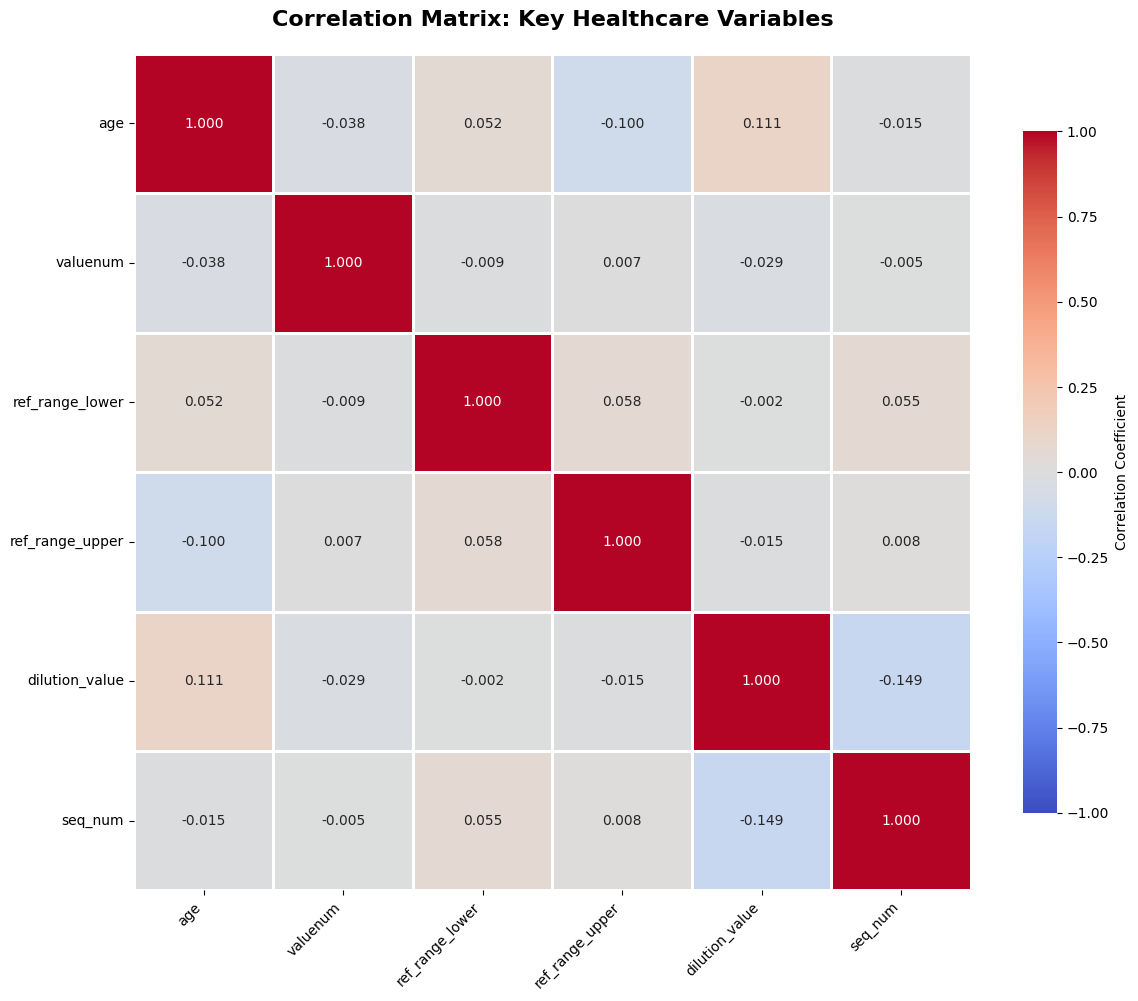


Correlation Insights:

Strongest correlations:
  • dilution_value ↔ seq_num: -0.149 (Weak negative)
  • age ↔ dilution_value: 0.111 (Weak positive)
  • age ↔ ref_range_upper: -0.100 (Weak negative)
  • ref_range_lower ↔ ref_range_upper: 0.058 (Weak positive)
  • ref_range_lower ↔ seq_num: 0.055 (Weak positive)

Correlation analysis complete!


In [11]:
# Compute correlation matrix and create heatmap
print("Creating correlation heatmap...")
print("="*60)

# Calculate correlation matrix (pairwise deletion of missing values)
correlation_matrix = correlation_data.corr(method='pearson')

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Create a beautiful heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.3f',   # Format to 3 decimal places
            cmap='coolwarm',  # Color scheme (blue=negative, red=positive)
            center=0,    # Center colormap at 0
            square=True,  # Make cells square
            linewidths=1,  # Add gridlines
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1,  # Set color scale limits
            ax=ax)

# Customize the plot
ax.set_title('Correlation Matrix: Key Healthcare Variables', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Save the plot
try:
    filepath = out_dir / "correlation_matrix_heatmap.jpg"
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"\nSaved: correlation_matrix_heatmap.jpg")
except Exception as e:
    print(f"\nCould not save plot: {e}")

plt.show()

# Additional insights
print("\nCorrelation Insights:")
print("="*60)

# Find strongest correlations (excluding diagonal)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        if not pd.isna(corr_val):
            corr_pairs.append((var1, var2, corr_val))

# Sort by absolute correlation value
corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

print("\nStrongest correlations:")
for var1, var2, corr in corr_pairs_sorted[:5]:
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"  • {var1} ↔ {var2}: {corr:.3f} ({strength} {direction})")

print("\nCorrelation analysis complete!")
